[View in Colaboratory](https://colab.research.google.com/github/KushalVenkatesh/Simple_Linear_Regression_from_Scratch_using_Ordinary_Least_Squares_Method/blob/master/_simple_linear_regression_using_ordinary_least_squares_method_to_the_dataset.ipynb)

In [0]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
import mpl_toolkits
from scipy import stats
from scipy.stats import norm

In [0]:
!pwd

/d/python2


In [0]:
#reading testing and training data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [0]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [0]:
print ('The training data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The testing data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The training data has 1460 rows and 81 columns
----------------------------
The testing data has 1459 rows and 80 columns


In [0]:
#checking the training data set information 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
#checking the testing data set information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [0]:
#checking if the training data set has any missing values.
train.columns[train.isnull().any()]

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

In [0]:
#Total number of columns in the training data set. 
#This means that there are totally 81 columns in the training data set
len(train.columns)

81

In [0]:
#This means Out of 81 features, 19 features have missing values. 
train.isnull().any().sum()

19

In [0]:
#finding out the percentage of missing value counts in each of these 19 columns
miss = train.isnull().sum()/len(train)
print(type(miss))
miss = miss[miss > 0]
miss.sort_values(inplace=True)
print(miss)
print(type(miss))
miss

<class 'pandas.core.series.Series'>
Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64
<class 'pandas.core.series.Series'>


Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [0]:
print type(miss)

<class 'pandas.core.series.Series'>


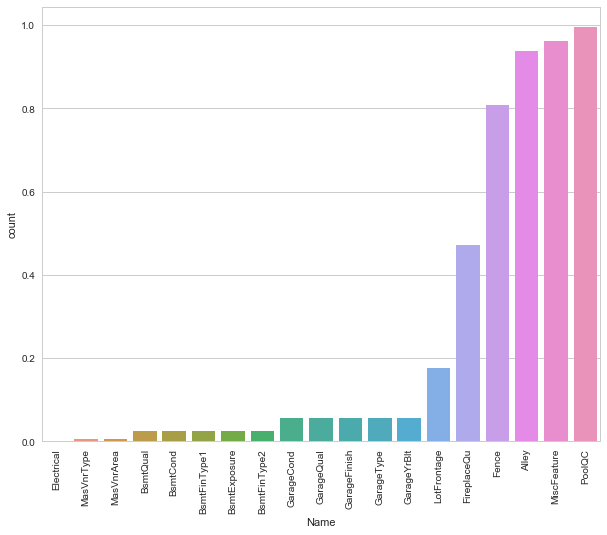

In [0]:
#Now lets start looking at a pretty picture explaining these missing values using a bar plot.
#visualising missing values
import seaborn as sns
#converting pandas.core.series.Series to pandas.core.frame.DataFrame
miss = miss.to_frame()
#print type(miss)
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

Infering from the above statistics that the variable PoolQC has 99.5% missing values
followed by variables MiscFeature, Alley, and Fence.

In [0]:
print type(miss)

<class 'pandas.core.frame.DataFrame'>


D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


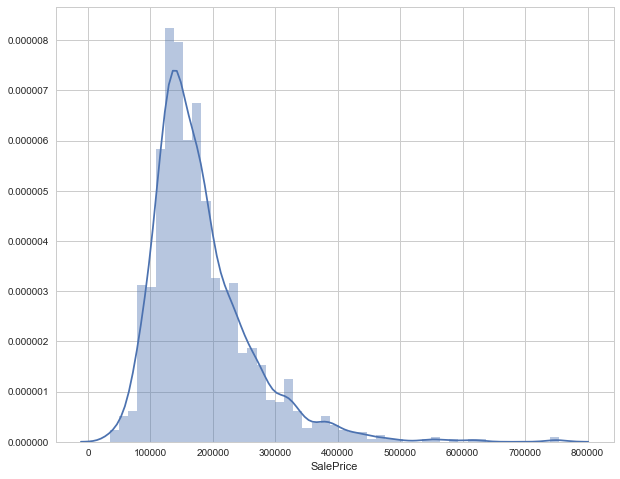

In [0]:
#checking the distribution of the target variable.
#SalePrice
sns.distplot(train['SalePrice'])


In the above plot, we see that the target variable SalePrice has a right-skewed distribution. We will need to log transform this variable so that it becomes normally distributed. A normally distributed or somewhere close to normal target variable helps in better modeling the relationship between target and independent variables. In addition to this, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric.

In [0]:
#confirming this skewed behavior using the skewness metric
#skewness
print "The skewness of SalePrice is {}".format(train['SalePrice'].skew())

The skewness of SalePrice is 1.88287575977


In [0]:
#Let's log transform this variable and see if this variable distribution can get any closer to normal.

The skewness value is 0.12133506220520406


D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


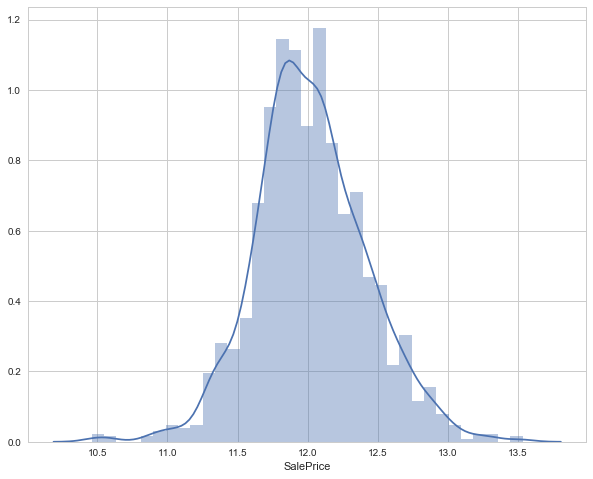

In [0]:
#Now transforming the target variable i.e. the 'SalePrice' variable
target = np.log(train['SalePrice'])
print 'The skewness value is', target.skew()
sns.distplot(target)

As we can see from the above plot, log transformation of the target variable has helped us in fixing its skewed distribution and the new distribution looks closer to normal. Since we have 80 variables, visualizing one by one wouldn't be an astute approach. Instead, we'll look at some variables based on their correlation with the target variable. However, there's a way to plot all variables at once, and we'll look at it as well. Moving forward, we'll separate numeric and categorical variables and explore this data from a different angle.

In [0]:
#separating variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in the training data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric and 43 categorical columns in the training data


In [0]:
del numeric_data['Id']

Now, we will learn more about the correlation behavior of numeric variables. Out of 38 variables, I presume some of them must be correlated. If found, we can later remove these correlated variables as they won't provide any useful information to the model.

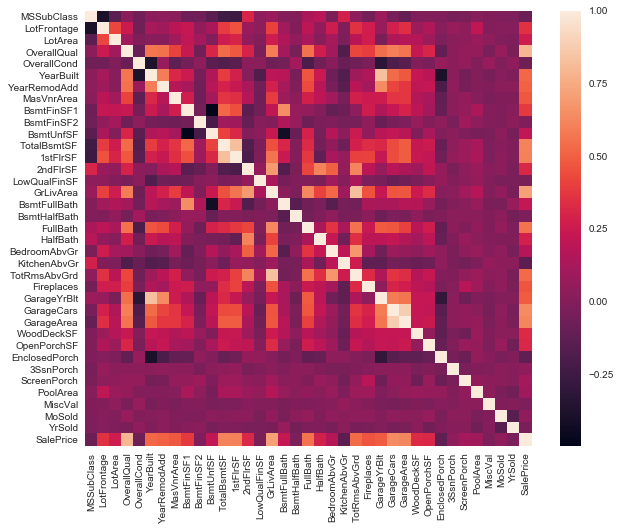

In [0]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In the above plot, let us notice the last row of this map. We can see the correlation of all variables against SalePrice. As we can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [0]:
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values`

(SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64, '\n')
----------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Here we see that the OverallQual feature is 79% correlated with the target variable.
Overallqual feature refers to the overall material and quality of the materials of the completed house.
Well, this makes perfect sense. People usually consider these parameters for their dream house.
In addition, GrLivArea is 70% correlated with the target variable. 
GrLivArea refers to the living area (in sq ft.) above ground.
The above following variables show people also care about if the house has a garage, 
the area of that garage, the size of the basement area, etc.


Now, let us check the OverallQual variable in detail.

In [0]:
train['OverallQual'].unique()


array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

The overall quality is measured on a scale of 1 to 10. 
Hence, we can fairly treat it as an ordinal variable. 
An ordinal variable has an inherent order. 
This is similar to Rank of students in class, data collected on Likert scale, etc.
Let us check the median sale price of houses with respect to OverallQual. 
We might be thinking, “Why median ?” We are using median because the target variable is skewed. 
A skewed variable has outliers and median is robust to outliers.

We can create such aggregated tables using pandas pivot tables

In [0]:
#Here let's start checking the mean price per quality and plot it.
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
print(type(pivot))
pivot.sort_values

<class 'pandas.core.frame.DataFrame'>


<bound method DataFrame.sort_values of              SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390>

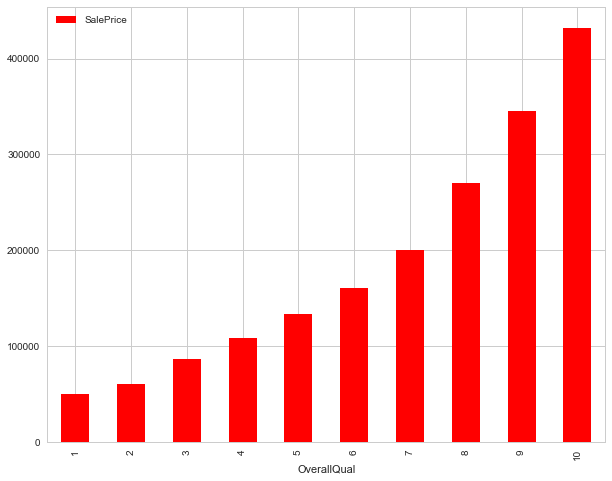

In [0]:
#Here Let's start plotting this table and understand the median behavior using a bar graph.
pivot.plot(kind='bar', color='red')

As we can see from the above plot, this behavior is quite normal. As the overall quality of a house increases, its sale price also increases. Let's visualize the next correlated variable GrLivArea and understand their behavior.

D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


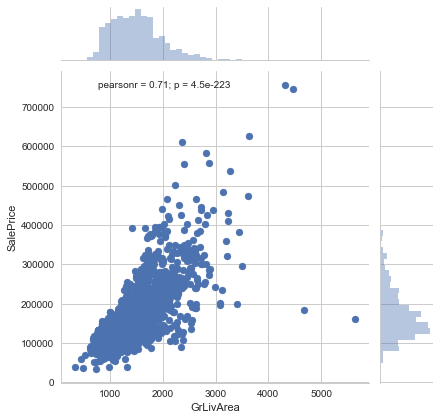

In [0]:
#lets start visualizing GrLivArea variable
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])

As we can see above, its a direct correlation of living area with sale price. 
However, we can spot an outlier value GrLivArea > 5000. 


#Data Pre-Processing
Here we'll deal with outlier values, encode variables, impute missing values, and take every possible initiative which we can in order to remove inconsistencies from the data set. 
If we remember, we discovered that the variable GrLivArea has outlier values. 
Precisely, one of the points crossed the 5000 mark as well. 
Let's remove all those that crossed the 4000 mark:

In [0]:
#Writing a function that returns a list of numerical and categorical features,
#excluding SalePrice and Id. 
def get_feature_groups():
    # Numerical Features
    num_features = train.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = train.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

In [0]:
num_features, cat_features = get_feature_groups()

In [0]:
#let's start understanding categorical variables by using .describe() command as follows
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [0]:
train[cat_features] = train[cat_features].fillna('Missing')

In [0]:
# Categorical features with "Missing" values
missing_values = (train[cat_features] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
dtype: int64

In [0]:
#marking as missing
test.loc[1116, 'GarageType'] = np.nan

In [0]:
# Since there's only one missing Electrical, setting it equal to the most common type
train.loc[train.Electrical == 'Missing', 'Electrical'] = train.Electrical.mode()[0]

In [0]:
# Now we are having "None" and "Missing"
train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Missing      8
Name: MasVnrType, dtype: int64

In [0]:
# Let's change "Missing" to "None" here.
train.MasVnrType.replace({'Missing':'None'}, inplace=True)

In [0]:
# We also notice a data discrepancy, we have 
# houses with MasVnrType == None but MasVnrArea > 0 and
# house with MasVnrArea == 0 but MasVnrType != None
# Let's fix these with the assumption that there was a mason veneer
train.loc[(train.MasVnrType == 'None') & (train.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace' # most common 
train.loc[(train.MasVnrType == 'None') & (train.MasVnrArea == 1), 'MasVnrArea'] = 0 # 1 sq ft is basically 0
for vnr_type in train.MasVnrType.unique():
    # so here we set the area equal to the mean of the given veneer type
    train.loc[(train.MasVnrType == vnr_type) & (train.MasVnrArea == 0), 'MasVnrArea'] = \
        train[train.MasVnrType == vnr_type].MasVnrArea.mean() 

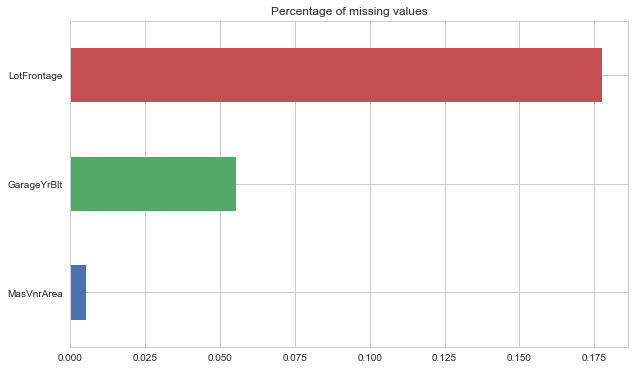

In [0]:
# Remaining missing values
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
missing_data = train.isnull().sum() / train.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()

In [0]:
# LotFrontage is "Linear feet of street connected to property"
#  It seems unlikely that there's no street connected to a lot, 
# Setting it equal to the median LotFrontage of that street.
train.LotFrontage = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [0]:
# GarageYrBlt missing means there's no garage
# Setting it equal to 0
train.GarageYrBlt.fillna(0, inplace=True)

In [0]:
# Finding out remaining null values
#train.isnull().sum().sum()

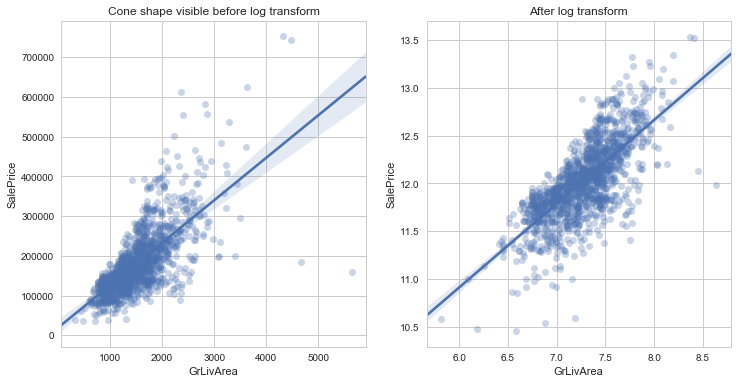

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(train.GrLivArea, train.SalePrice, scatter_kws={'alpha':0.3})
plt.title('Cone shape visible before log transform')

plt.subplot(122)
sns.regplot(np.log1p(train.GrLivArea), np.log1p(train.SalePrice), scatter_kws={'alpha':0.3})
plt.title('After log transform')
plt.show()

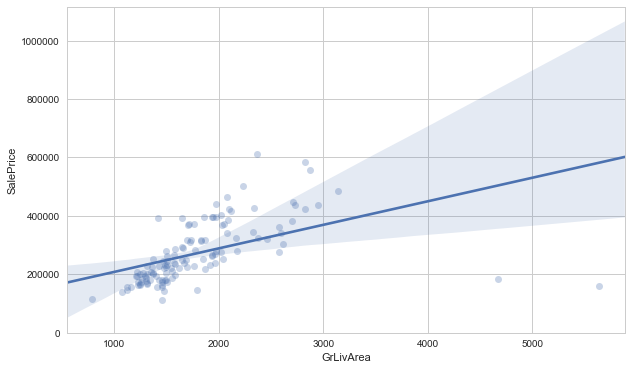

In [0]:
# We see the outliers but are also interested in those Partial Sale outliers
plt.figure(figsize=(10,6))
sns.regplot(train[train.SaleCondition == 'Partial'].GrLivArea,
            train[train.SaleCondition == 'Partial'].SalePrice, scatter_kws={'alpha':0.3})
plt.show()

We cut out anything over 4,000 sq ft


In [0]:
train.drop(train[train.GrLivArea >= 4000].index, inplace=True)

In [0]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [0]:
# Reading Data
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
# Collecting X and Y
X = data['OverallQual'].values
Y = data['SalePrice'].values

Simple Linear Regression:

Here is a brief description on our Model Representation:

Here we have an input variable - X and one output variable - Y. And we want to build linear relationship between these variables. Here the input variable is called Independent Variable, X in our case and the output variable, Y in our case is called Dependent Variable. We can define this linear relationship as follows:

Y=β0+β1X;

Where the β1 is called a scale factor or coefficient and β0 is called bias coefficient. The bias coeffient gives an extra degree of freedom to this model. This equation is similar to the equation of a straight line. The equation is represented as y=mx+b with m=β1(Slope) and b=β0(Intercept). 

So in this Simple Linear Regression model we want to draw a line between X and Y which estimates the relationship between X and Y.

To find the values β1 and β0, we will need mean of X and Y. We will find these and the coeffients.
We will use ordinary least squares method. 

In [0]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print(b1, b0)

(45435.802593099426, -96206.07951476055)


Now we have our coefficients.

SalePrice = -96206.07951476055 + 45435.802593099426∗OverallQual

This is our Simple linear Regression model.

Now we will see this graphically.

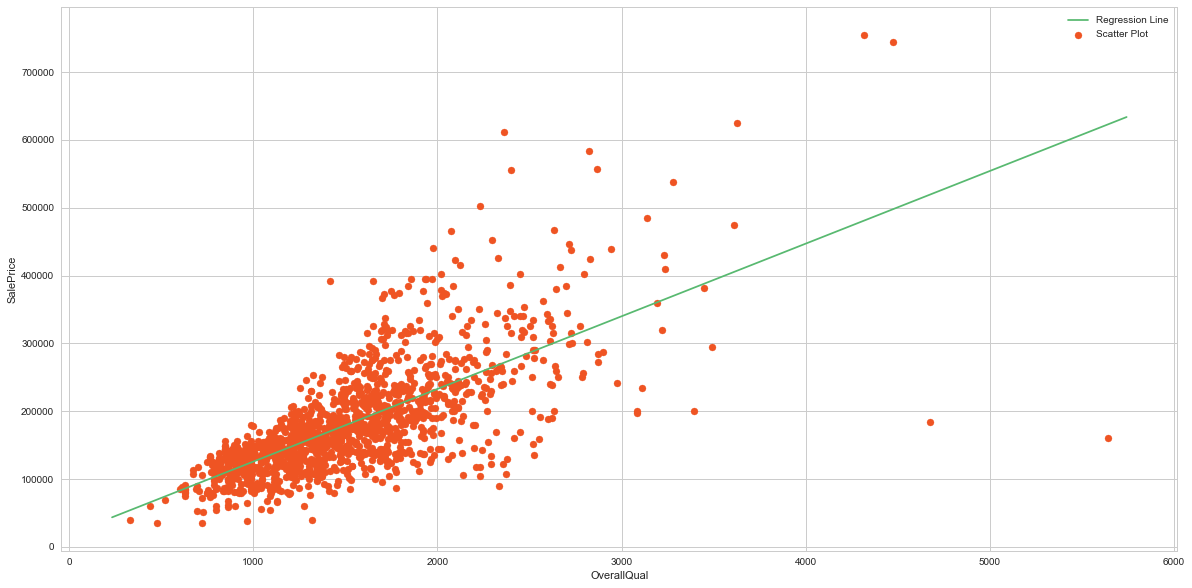

In [0]:
# Plotting the values and the Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating the line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
#plt.xlim(-1,11) 
#plt.ylim(-100,1000000)
plt.legend()
plt.show()

We will use Root Mean Squared Error and Coefficient of Determination(R^2 Score).

Root Mean Squared Error is the square root of the sum of all errors divided by number of values.

In [0]:
# Calculating the Root Mean Squares Error (RMSE)
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

48589.44712143805


The R^2 Score usually range from 0 to 1. Now we will find R^2 Score.

In [0]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6256518924621186


The R^2 is 0.626 which means that 62.6% of the relationship between the dependent variable which is the SalePrice and the independent variable which is the OverallQual has been captured by this model.

In [0]:
#Applying Simple Linear Regression between SalePrice and GrLivArea

In [0]:
# Collecting X and Y
X = data['GrLivArea'].values
Y = data['SalePrice'].values

In [0]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print(b1, b0)

(107.13035896582502, 18569.025856487482)


Now we have our new coefficients.

SalePrice = -96206.07951476055 + 45435.802593099426∗GrLivArea

Now this is our Simple linear Regression model.

We will see this graphically.

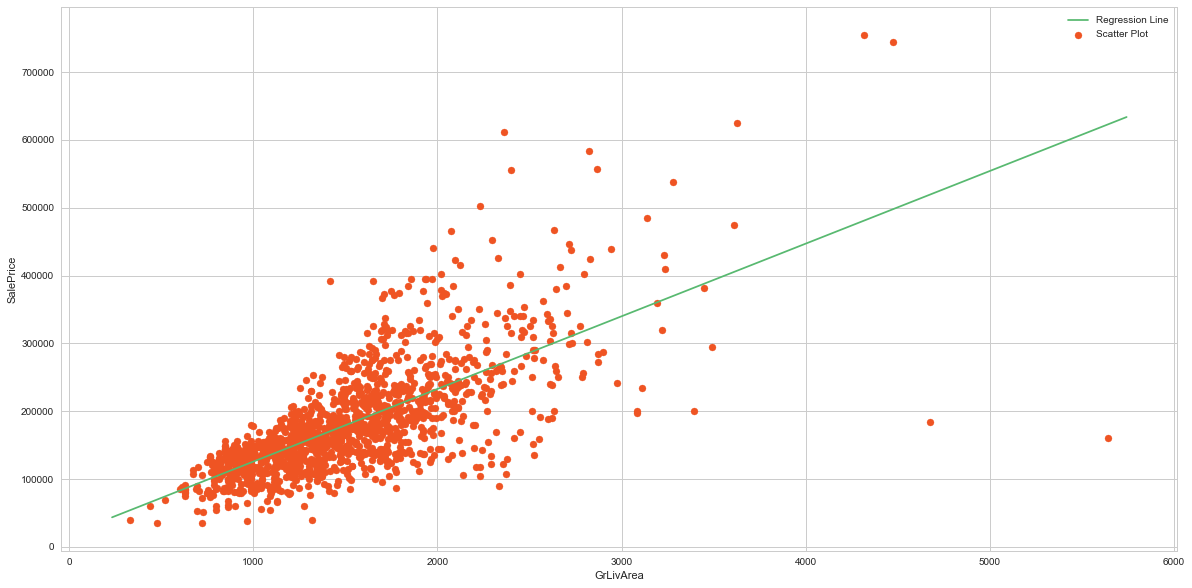

In [0]:
# Plotting the new values and the Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating the line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
#plt.xlim(-1,11) 
#plt.ylim(-100,1000000)
plt.legend()
plt.show()

In [0]:
# Calculating the Root Mean Squares Error (RMSE)
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

56034.30386527994


In [0]:
#Computing R^2 score
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.5021486502718047


The R^2 is 0.502 which means that 50.2% of the relationship between the dependent variable which is the SalePrice and the independent variable which is the GrLivArea has been captured by this model.